___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

## Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the **arrest rate**. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops. Then, you'll calculate the **hourly arrest rate** by using the ``hour`` attribute of the ``index``. The hour ranges from ``0`` to ``23``, in which:

``0 = midnight``<br>
``12 = noon`` <br>
``23 = 11 PM``

> Before starting your work in this section **repeat the steps which you did in the first chapter for preparing the data.** Continue to this chapter based on where you were in the end of the first chapter.

In [194]:
import pandas as pd
ri = pd.read_csv('police.csv')
ri.head(3)

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,NaN,NaN,NaN,0,NaN,...,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1


In [195]:
ri.drop(['county_name','state'], axis=1, inplace=True)
ri.shape

(509681, 24)

In [196]:
ri.dropna(subset=['driver_gender'], inplace = True)
ri.isnull().sum()

id                            0
stop_date                     0
stop_time                     0
location_raw                  0
county_fips              480584
fine_grained_location    480584
police_department             0
driver_gender                 0
driver_age_raw                1
driver_age                 1638
driver_race_raw               0
driver_race                   0
violation_raw                 0
violation                     0
search_conducted              0
search_type_raw          462822
search_type              462822
contraband_found              0
stop_outcome                  0
is_arrested                   0
stop_duration                 0
out_of_state                808
drugs_related_stop            0
district                      0
dtype: int64

In [197]:
ri.astype({'is_arrested': 'bool'}).dtypes

id                        object
stop_date                 object
stop_time                 object
location_raw              object
county_fips              float64
fine_grained_location    float64
police_department         object
driver_gender             object
driver_age_raw           float64
driver_age               float64
driver_race_raw           object
driver_race               object
violation_raw             object
violation                 object
search_conducted          object
search_type_raw           object
search_type               object
contraband_found            bool
stop_outcome              object
is_arrested                 bool
stop_duration             object
out_of_state              object
drugs_related_stop          bool
district                  object
dtype: object

In [198]:
ri['stop_datetime'] = pd.to_datetime(ri['stop_date'] + ' ' + ri['stop_time'])

In [199]:
#ri.drop(['stop_date', 'stop_time'], axis=1, inplace=True)

In [200]:
ri.set_index('stop_datetime', inplace = True)

**INSTRUCTIONS**

*   Take the mean of the ``is_arrested`` column to calculate the overall arrest rate.
*   Group by the ``hour`` attribute of the ``DataFrame`` index to calculate the hourly arrest rate.
*   Save the **hourly arrest rate** ``Series`` as a new object, ``hourly_arrest_rate``.

In [201]:
ri['is_arrested'].mean() * 100

3.454755048024903

In [202]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
ri['is_arrested'] = labelencoder.fit_transform(ri['is_arrested'])

In [203]:
#ri.is_arrested

In [204]:
#ri['datehour'] = ri.index.hour

In [205]:
#ri.head(3)

In [207]:
#ri.groupby('datehour')['is_arrested'].value_counts(normalize=True)

In [208]:
ri.groupby(ri.index.hour)["is_arrested"].mean()

stop_datetime
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: is_arrested, dtype: float64

In [209]:
hourly_arrest_rate = ri.groupby(ri.index.hour)["is_arrested"].mean()

***

## Plotting the hourly arrest rate

You'll create a line plot from the ``hourly_arrest_rate`` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

**INSTRUCTIONS**

*   Import ``matplotlib.pyplot`` using the alias ``plt``.
*   Create a **line plot** of ``hourly_arrest_rate`` using the ``.plot()`` method.
*   Label the ``x-axis`` as ``'Hour'``, label the ``y-axis`` as ``'Arrest Rate'``, and title the plot ``'Arrest Rate by Time of Day'``.
*   Display the plot using the ``.show()`` function.

In [210]:
import matplotlib.pyplot as plt

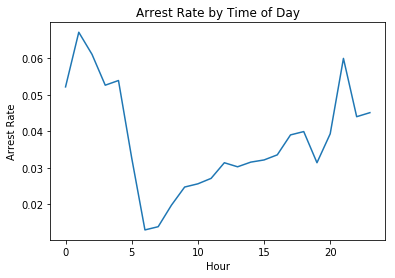

In [211]:
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title('Arrest Rate by Time of Day')
plt.plot(hourly_arrest_rate)
plt.show();

***

## Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. You'll assess whether these **drug-related stops** are becoming more common over time.

The Boolean column ``drugs_related_stop`` indicates whether drugs were found during a given stop. You'll calculate the **annual drug rate** by **resampling** this column, and then you'll use a line plot to visualize how the rate has changed over time.

**INSTRUCTIONS**

*   Calculate the **annual rate** of drug-related stops by **resampling** the ``drugs_related_stop`` column (on the ``'A'`` frequency) and taking the mean.
*   Save the annual drug rate ``Series`` as a new object, ``annual_drug_rate``.
*   Create a line plot of ``annual_drug_rate`` using the ``.plot()`` method.
*   Display the plot using the ``.show()`` function.

In [212]:
ri.drugs_related_stop.resample('A').mean()

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.008437
2008-12-31    0.007549
2009-12-31    0.010447
2010-12-31    0.010142
2011-12-31    0.011400
2012-12-31    0.010343
2013-12-31    0.011879
2014-12-31    0.013176
2015-12-31    0.010598
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [213]:
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

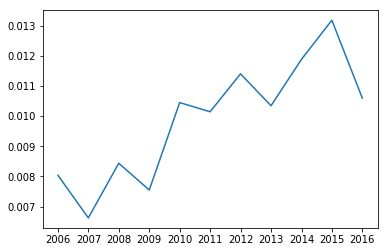

In [214]:
import matplotlib.pyplot as plt
plt.plot(annual_drug_rate);

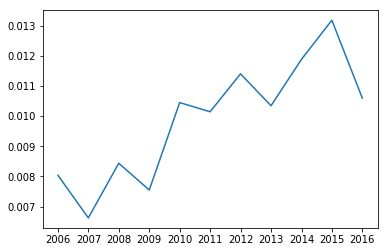

In [215]:
plt.plot(annual_drug_rate)
plt.show()

***

## Comparing drug and search rates (to be deleted)

As you saw in the last exercise, the rate of **drug-related stops** increased significantly between ``2005`` and ``2015``. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

**INSTRUCTIONS**

*   Calculate the annual search rate by **resampling** the ``search_conducted`` column, and save the result as ``annual_search_rate``.
*   Concatenate ``annual_drug_rate`` and ``annual_search_rate`` along the ``columns axis``, and save the result as ``annual``.
*   Create subplots of the drug and search rates from the ``annual`` ``DataFrame``.
*   Display the subplots.

In [216]:
annual_search_rate = ri.search_conducted.resample('A').count()

In [217]:
annual = pd.concat([annual_drug_rate,annual_search_rate],axis=1)

In [218]:
annual.head(3)

,drugs_related_stop,search_conducted
stop_datetime,,
2005-12-31,0.008038,13809
2006-12-31,0.006624,55552
2007-12-31,0.008437,50139


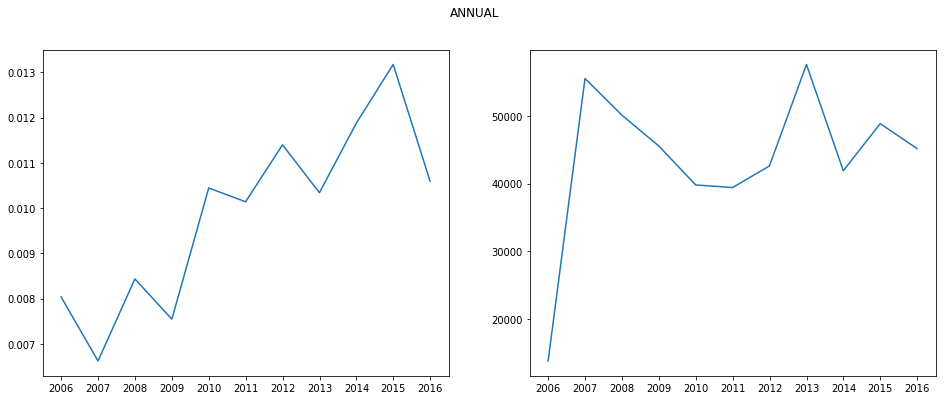

In [219]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6))
fig.suptitle('ANNUAL')
ax1.plot(annual.drugs_related_stop)
ax2.plot(annual.search_conducted);

***

## Tallying violations by district

The state of **Rhode Island** is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the ``"K"`` zones, which you'll examine further in the next exercise.

**INSTRUCTIONS**

*   Create a ``frequency table`` from the ``district`` and ``violation`` columns using the ``pd.crosstab()`` function.
*   Save the ``frequency table`` as a new object, ``all_zones``.
*   Select rows ``'Zone K1'`` through ``'Zone K3'`` from ``all_zones`` using the ``.loc[]`` accessor.
*   Save the smaller table as a new object, ``k_zones``.

In [220]:
pd.crosstab(ri.district, ri.violation, dropna=False)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234
Zone X1,1725,3711,752,192,451,6393
Zone X3,11520,17178,4069,3532,4445,48687
Zone X4,19975,29554,8865,7551,4870,54855


In [221]:
all_zones = pd.crosstab(ri.district, ri.violation, dropna=False)

In [222]:
all_zones.loc[['Zone K1','Zone K2', 'Zone K3']]

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234


***

## Plotting violations by district

Now that you've created a frequency table focused on the ``"K"`` zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a **bar plot**, which is an appropriate plot type since you're comparing categorical data. Then you'll create a **stacked bar plot** in order to get a slightly different look at the data. Which plot do you find to be more insightful?

**INSTRUCTIONS 1/2**

*   Create a bar plot of ``k_zones``.
*   Display the plot and examine it. What do you notice about each of the zones?

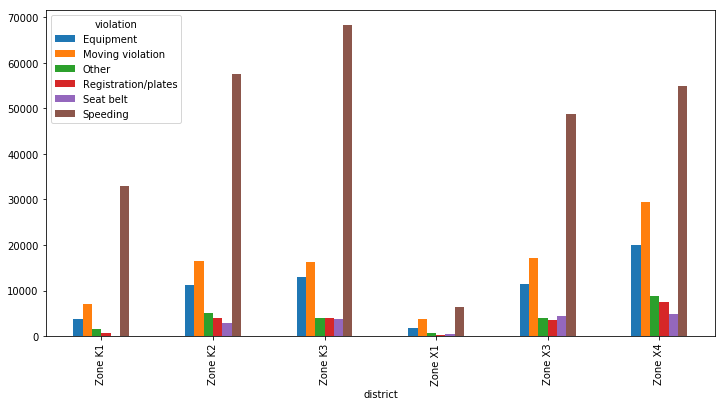

In [223]:
k_zones = all_zones.plot.bar(figsize=(12,6))

**INSTRUCTIONS 2/2**

*   Create a stacked bar plot of ``k_zones``.
*   Display the plot and examine it. Do you notice anything different about the data than you did previously?

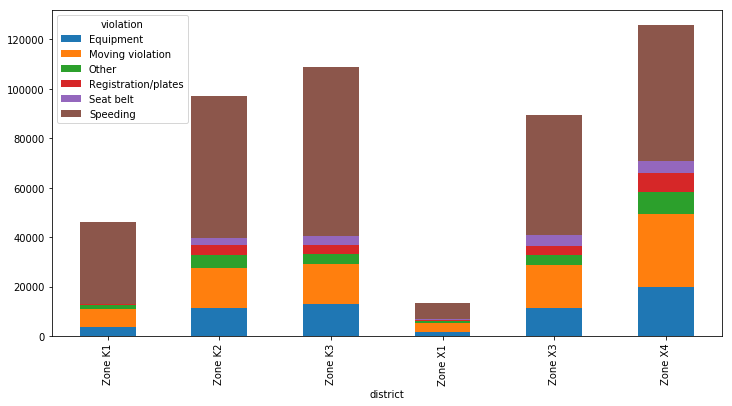

In [224]:
k_zones = all_zones.plot.bar(stacked=True,figsize=(12,6))

## The stacked bar graph gives an idea of the infringement amount in each Region. Zone X1 has the least violations, while Zone X4 has the maximum violations.

***

## Converting stop durations to numbers

In the traffic stops dataset, the ``stop_duration`` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as ``strings``, such as ``'0-15 Min'``. How can you make this data easier to analyze?

In this exercise, you'll convert the **stop durations** to ``integers``. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

*   Convert ``'0-15 Min'`` to ``8``
*   Convert ``'16-30 Min'`` to ``23``
*   Convert ``'30+ Min'`` to ``45``

**INSTRUCTIONS**

*   Print the **unique values** in the ``stop_duration`` column. (This has been done for you.)
*   Create a ``dictionary`` called ``mapping`` that maps the ``stop_duration`` strings to the integers specified above.
*   Convert the ``stop_duration`` strings to integers using the ``mapping``, and store the results in a new column called ``stop_minutes``.
*   Print the unique values in the ``stop_minutes`` column, to verify that the durations were properly converted to integers.

In [225]:
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min', '2', '1'], dtype=object)

In [226]:
mapping = {'0-15 Min':8,'16-30 Min':23,'30+ Min':45,'2':2,'1':1}

In [227]:
stop_minutes = ri.stop_duration.map(mapping)

In [228]:
ri['stop_minutes']= stop_minutes

In [229]:
print(ri.stop_minutes.unique())

[ 8 23 45  2  1]


In [236]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 480584 entries, 2005-01-02 01:55:00 to 2015-12-31 23:48:00
Data columns (total 23 columns):
id                       480584 non-null object
location_raw             480584 non-null object
county_fips              0 non-null float64
fine_grained_location    0 non-null float64
police_department        480584 non-null object
driver_gender            480584 non-null object
driver_age_raw           480583 non-null float64
driver_age               478946 non-null float64
driver_race_raw          480584 non-null object
driver_race              480584 non-null object
violation_raw            480584 non-null object
violation                480584 non-null object
search_conducted         480584 non-null object
search_type_raw          17762 non-null object
search_type              17762 non-null object
contraband_found         480584 non-null bool
stop_outcome             480584 non-null object
is_arrested              480584 non-null int64
st

***

## Plotting stop length

**INSTRUCTIONS**

*   For each value in the ``violation_raw`` column, calculate the **mean number** of ``stop_minutes`` that a driver is detained.
*   Save the resulting ``Series`` as a new object, ``stop_length``.
*   Sort ``stop_length`` by its values, and then visualize it using a **horizontal bar plot**.
*   Display the plot.

In [237]:
ri.groupby('violation_raw').agg({'stop_minutes':'mean'})

,stop_minutes
violation_raw,
APB,18.593814
Call for Service,21.963314
Equipment/Inspection Violation,11.454155
Motorist Assist/Courtesy,17.629929
Other Traffic Violation,13.833943
Registration Violation,13.543268
Seatbelt Violation,9.698236
Special Detail/Directed Patrol,14.876778
Speeding,10.589143


In [238]:
stop_length = ri.groupby('violation_raw').agg({'stop_minutes':'mean'})

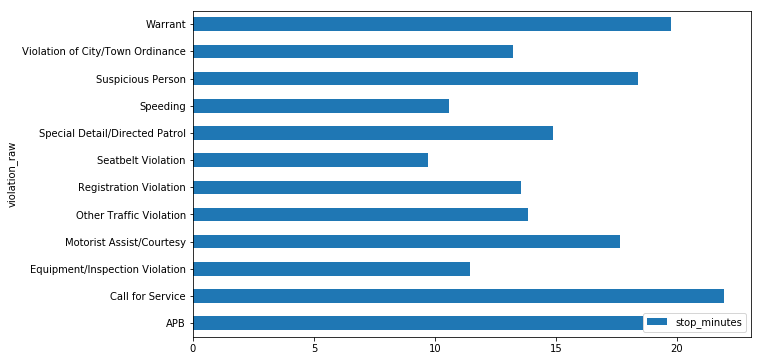

In [240]:
ax = stop_length.plot.barh(figsize=(10,6))

In [242]:
ri.to_csv('police_visual.csv')